In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("./Heart.csv",index_col="Unnamed: 0")

In [6]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [8]:
data = data.dropna()#去掉na值

In [9]:
data.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [10]:
data["ChestPain"].value_counts()

asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: ChestPain, dtype: int64

In [12]:
data["ChestPain"] = data["ChestPain"].map({"asymptomatic":0,"nonanginal":1,"nontypical":2,"typical":3})

In [13]:
data.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    int64  
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(10), object(2)
memory usage: 34.8+ KB


In [16]:
data["Thal"].value_counts()

normal        164
reversable    115
fixed          18
Name: Thal, dtype: int64

In [17]:
data["Thal"] = data["Thal"].map({"normal":0,"reversable":1,"fixed":2})

In [18]:
data.AHD.value_counts()

No     160
Yes    137
Name: AHD, dtype: int64

In [19]:
X = data.drop(columns=["AHD"])
y = data.AHD.map({"Yes":1,"No":0})

In [20]:
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,1
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,0,123,1,0.2,2,0.0,1
299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,1
300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,1
301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,1


In [21]:
y

1      0
2      1
3      1
4      0
5      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: AHD, Length: 297, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=10)

# 过滤式(Flter)

## 方差选择法

In [23]:
from sklearn.feature_selection import VarianceThreshold
sel_var = VarianceThreshold(threshold=.5) # 设定方差阈值0.5

In [24]:
sel_var_x = sel_var.fit_transform(X_train)

In [25]:
sel_var_x.shape

(237, 8)

In [26]:
print(pd.Series(sel_var.get_support(),index=X_train.columns).sort_values())

Sex          False
Fbs          False
ExAng        False
Slope        False
Thal         False
Age           True
ChestPain     True
RestBP        True
Chol          True
RestECG       True
MaxHR         True
Oldpeak       True
Ca            True
dtype: bool


# 卡方选择法

In [27]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [29]:
sel_p_chi = SelectPercentile(chi2,percentile=60).fit(X,y)#选择60%

In [30]:
print(sel_p_chi.scores_)

[2.29176975e+01 7.44419531e+00 5.47476352e+01 1.67074632e+01
 2.08550836e+01 2.54731794e-03 8.13465196e+00 1.87053104e+02
 3.55080899e+01 6.85705327e+01 7.82883557e+00 8.27306134e+01
 4.77899553e+01]


In [31]:
print(pd.Series(sel_p_chi.get_support(),index=X.columns).sort_values())

Sex          False
RestBP       False
Fbs          False
RestECG      False
Slope        False
Age           True
ChestPain     True
Chol          True
MaxHR         True
ExAng         True
Oldpeak       True
Ca            True
Thal          True
dtype: bool


In [32]:
from sklearn.feature_selection import SelectKBest,chi2
sel_b_chi = SelectKBest(chi2,k=8).fit(X,y)#卡方选择法，选择8个特征

In [33]:
print(sel_b_chi.scores_)

[2.29176975e+01 7.44419531e+00 5.47476352e+01 1.67074632e+01
 2.08550836e+01 2.54731794e-03 8.13465196e+00 1.87053104e+02
 3.55080899e+01 6.85705327e+01 7.82883557e+00 8.27306134e+01
 4.77899553e+01]


In [34]:
print(pd.Series(sel_b_chi.get_support(),index=X.columns.sort_values()))

Age           True
Ca           False
ChestPain     True
Chol         False
ExAng         True
Fbs          False
MaxHR        False
Oldpeak       True
RestBP        True
RestECG       True
Sex          False
Slope         True
Thal          True
dtype: bool


# 相关系数选择法

每个特征 X 单独和 Y 计算相关系数, 并排序. 特征选择就是基于 X 和 Y 的相关程度.

In [35]:
from sklearn.feature_selection import f_regression
sel_bf_chi=SelectKBest(f_regression,k=8).fit(X,y) #卡方选择法，选择8个特征
print(sel_bf_chi.scores_)
print(pd.Series(sel_bf_chi.get_support(),index=X.columns).sort_values())

[1.60380965e+01 2.47983475e+01 5.92419147e+01 7.11764643e+00
 1.91379983e+00 2.95852886e-03 8.39498663e+00 6.45898547e+01
 6.36802533e+01 6.46772084e+01 3.68042999e+01 8.05778659e+01
 8.34114563e+01]
Age          False
RestBP       False
Chol         False
Fbs          False
RestECG      False
Sex           True
ChestPain     True
MaxHR         True
ExAng         True
Oldpeak       True
Slope         True
Ca            True
Thal          True
dtype: bool


In [36]:
from sklearn.feature_selection import f_regression #相关系数选择法
sel_pf_chi=SelectPercentile(f_regression,percentile=60).fit(X,y)
print(sel_pf_chi.scores_)
print(pd.Series(sel_pf_chi.get_support(),index=X.columns).sort_values())

[1.60380965e+01 2.47983475e+01 5.92419147e+01 7.11764643e+00
 1.91379983e+00 2.95852886e-03 8.39498663e+00 6.45898547e+01
 6.36802533e+01 6.46772084e+01 3.68042999e+01 8.05778659e+01
 8.34114563e+01]
Age          False
RestBP       False
Chol         False
Fbs          False
RestECG      False
Sex           True
ChestPain     True
MaxHR         True
ExAng         True
Oldpeak       True
Slope         True
Ca            True
Thal          True
dtype: bool


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, '相关系数-百分比')

<Figure size 800x600 with 0 Axes>

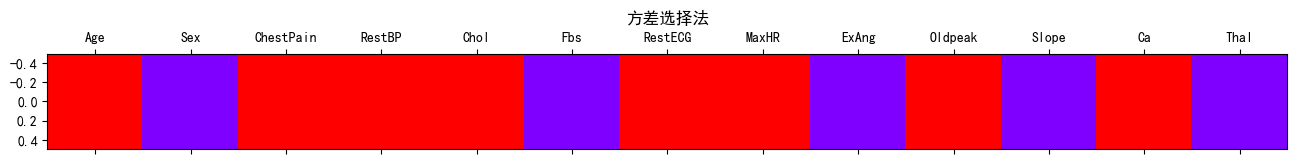

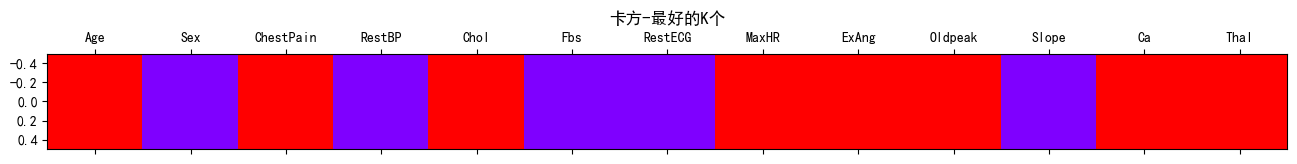

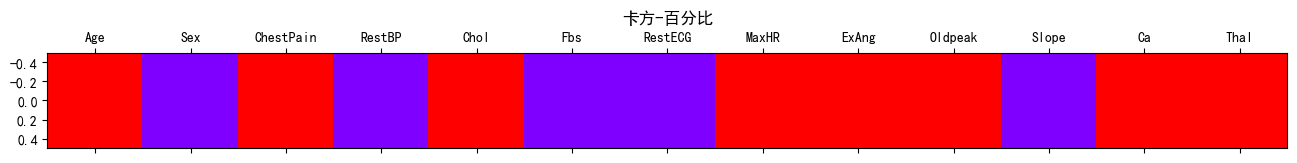

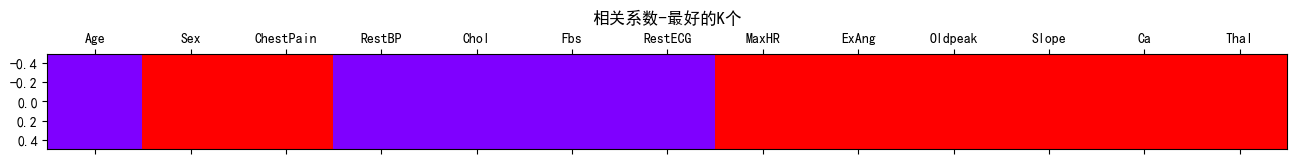

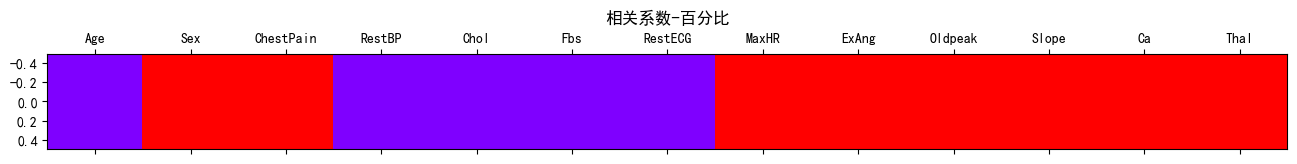

In [38]:
#可视化选择的结果
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(8,6))
#plt.xticks(range(13),X.columns)
plt.matshow(sel_var.get_support().reshape(1,-1),cmap="rainbow")
plt.xticks(range(13),X.columns)
plt.title("方差选择法")
plt.matshow(sel_b_chi.get_support().reshape(1,-1),cmap="rainbow",)
plt.xticks(range(13),X.columns)
plt.title("卡方-最好的K个")
plt.matshow(sel_p_chi.get_support().reshape(1,-1),cmap="rainbow")
plt.xticks(range(13),X.columns)
plt.title("卡方-百分比")
plt.matshow(sel_bf_chi.get_support().reshape(1,-1),cmap="rainbow",)
plt.xticks(range(13),X.columns)
plt.title("相关系数-最好的K个")
plt.matshow(sel_pf_chi.get_support().reshape(1,-1),cmap="rainbow")
plt.xticks(range(13),X.columns)
plt.title("相关系数-百分比")

# RFE 递归 Wrapper

## 单个模型

In [39]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [40]:
rfe=RFE(DecisionTreeClassifier(random_state=10),n_features_to_select=8) 
rfe_x=rfe.fit_transform(X_train,y_train)

In [41]:
rfe_x.shape

(237, 8)

In [42]:
X_test.shape

(60, 13)

In [43]:
rfe.score(X_test,y_test) #使用原始全部特征，使用时自动去除

0.85

In [44]:
rfe.score(X_train,y_train)

1.0

In [45]:
rfe.estimator_.score(rfe_x,y_train) #需要用选择好的特征

1.0

In [46]:
rfe_X_test=rfe.transform(X_test)

In [47]:
rfe.estimator_.score(rfe_X_test,y_test)

0.85

In [48]:
y_pred=rfe.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.85

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.77      0.92      0.84        25

    accuracy                           0.85        60
   macro avg       0.85      0.86      0.85        60
weighted avg       0.86      0.85      0.85        60



In [51]:
rfe.ranking_

array([1, 2, 1, 1, 1, 6, 5, 1, 4, 1, 3, 1, 1])

In [52]:
rfe.support_

array([ True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True,  True])

In [53]:
print(pd.Series(rfe.support_,index=X.columns).sort_values())

Sex          False
Fbs          False
RestECG      False
ExAng        False
Slope        False
Age           True
ChestPain     True
RestBP        True
Chol          True
MaxHR         True
Oldpeak       True
Ca            True
Thal          True
dtype: bool


Text(0.5, 1.0, '单模型，递归')

<Figure size 800x600 with 0 Axes>

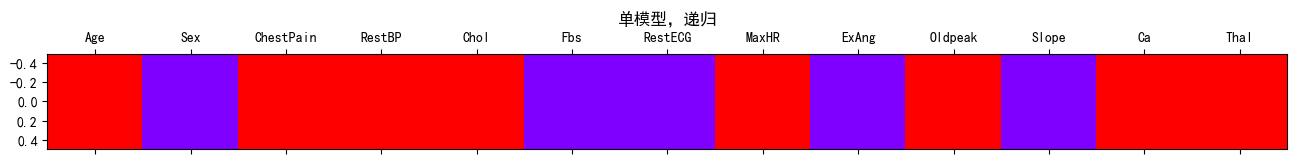

In [54]:
plt.figure(figsize=(8,6))
plt.matshow(rfe.support_.reshape(1,-1),cmap="rainbow")
plt.xticks(range(13),X.columns)
plt.title("单模型，递归")

## 单个模型 K折交叉检验

In [55]:
from sklearn.feature_selection import RFECV
#单个模型 K折交叉检验
rfeCV=RFECV(DecisionTreeClassifier(random_state=0),cv=5,min_features_to_select=8)
rfeCV.fit(X_train,y_train)

RFECV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
      min_features_to_select=8)

In [56]:
print(pd.Series(rfeCV.ranking_,index=X_train.columns))

Age          1
Sex          1
ChestPain    1
RestBP       1
Chol         1
Fbs          3
RestECG      4
MaxHR        1
ExAng        2
Oldpeak      1
Slope        1
Ca           1
Thal         1
dtype: int32


In [57]:
rfeCV.get_support()

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True])

Text(0.5, 1.0, '单模型，递归，CV')

<Figure size 800x600 with 0 Axes>

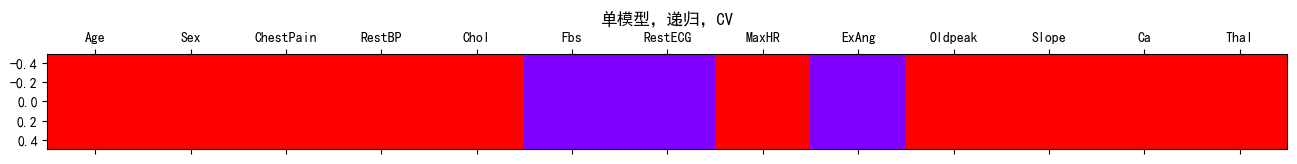

In [58]:
plt.figure(figsize=(8,6))
plt.matshow(rfeCV.get_support().reshape(1,-1),cmap="rainbow")
plt.xticks(range(13),X.columns)
plt.title("单模型，递归，CV")
#红色被选中

# 集成模型

In [59]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
rfeCV_rf=RFECV(GradientBoostingClassifier(n_estimators=50,random_state=0),
 min_features_to_select=8,cv=5)
rfeCV_rf.fit(X_train,y_train)

RFECV(cv=5,
      estimator=GradientBoostingClassifier(n_estimators=50, random_state=0),
      min_features_to_select=8)

In [61]:
rfeCV_rf.transform(X_train)

array([[66.,  1.,  0., ...,  1.,  0.,  2.],
       [53.,  0.,  0., ...,  1.,  0.,  0.],
       [49.,  1.,  2., ...,  1.,  0.,  0.],
       ...,
       [57.,  1.,  1., ...,  1.,  0.,  0.],
       [56.,  0.,  0., ...,  3.,  2.,  1.],
       [42.,  1.,  1., ...,  1.,  0.,  0.]])

In [62]:
rfeCV_rf.score(X_test,y_test)

0.8833333333333333

Text(0.5, 1.0, '集成模型，递归，CV')

<Figure size 800x600 with 0 Axes>

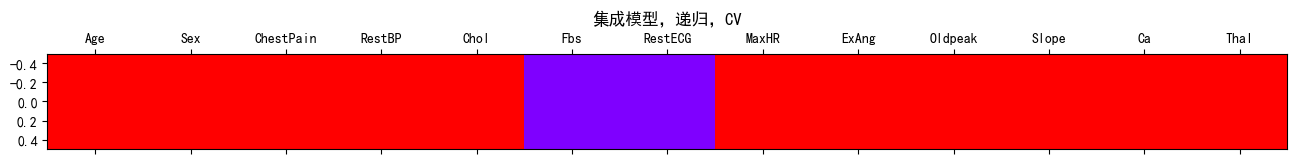

In [63]:
plt.figure(figsize=(8,6))
plt.matshow(rfeCV_rf.get_support().reshape(1,-1),cmap="rainbow")
plt.xticks(range(13),X.columns)
plt.title("集成模型，递归，CV")
#红色被选中

# Embedding

## 单个模型

In [64]:
from sklearn.feature_selection import SelectFromModel
select=SelectFromModel(DecisionTreeClassifier(random_state=10),threshold="mean")
select.fit(X_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier(random_state=10),
                threshold='mean')

In [65]:
select_X1=select.transform(X_train)

In [66]:
select_X1.shape

(237, 7)

In [67]:
select.estimator_.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [68]:
select.estimator_.score(X_train,y_train)

1.0

In [69]:
select.get_support()

array([ True, False,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True])

Text(0.5, 1.0, '单模型，Embedding')

<Figure size 800x600 with 0 Axes>

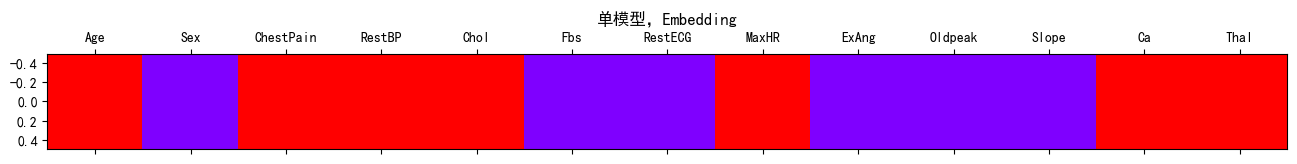

In [70]:
plt.figure(figsize=(8,6))
plt.matshow(select.get_support().reshape(1,-1),cmap="rainbow")
plt.xticks(range(13),X.columns)
plt.title("单模型，Embedding")

## 集成模型

In [71]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select_rf=SelectFromModel(RandomForestClassifier(n_estimators=200,random_state=10),threshold="mean")
select_X=select_rf.fit_transform(X_train,y_train)

In [72]:
select_rf.get_support()

array([ True, False,  True, False,  True, False, False,  True, False,
        True, False,  True,  True])

In [73]:
select_rf.estimator_.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [74]:
select_rf.estimator_.score(X_test,y_test)

0.8333333333333334

Text(0.5, 1.0, '集成模型，Embedding')

<Figure size 800x600 with 0 Axes>

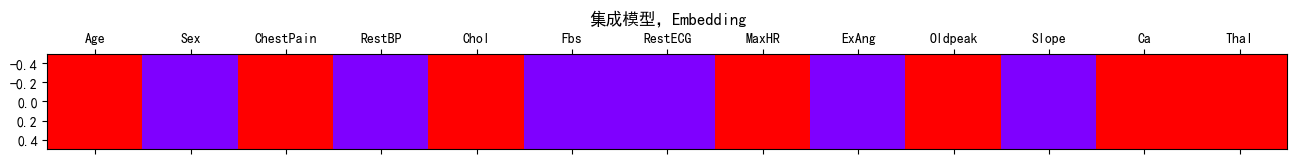

In [75]:
plt.figure(figsize=(8,6))
plt.matshow(select_rf.get_support().reshape(1,-1),cmap="rainbow")
plt.xticks(range(13),X.columns)
plt.title("集成模型，Embedding")